In [1]:
import numpy as np
import pandas as pd
import math
import datetime
import matplotlib.pyplot as plt 
from matplotlib import style
from sklearn import preprocessing, cross_validation, svm 
from sklearn.linear_model import LinearRegression
import pickle

C:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df = pd.read_csv("https://www.quandl.com/api/v3/datasets/BITCOINWATCH/MINING.csv?api_key=1hxGxN5vBzP6LiH_kfTH")

The original data set has now been imported. 

In [3]:
df.head(2)

,Date,Total BTC,Market Cap,Transactions last 24h,Transactions avg. per hour,Bitcoins sent last 24h,Bitcoins sent avg. per hour,Count,Blocks last 24h,Blocks avg. per hour,Difficulty,Next Difficulty,Network Hashrate Terahashs,Network Hashrate PetaFLOPS
0,2017-07-01,16424225.0,4.116292e+10,194995.0,8124.79,1775480.86,73978.37,473937.0,188.0,7.83,7.086595e+11,7.256475e+11,5194386.85,65968713.02
1,2017-06-30,16421875.0,4.153053e+10,228400.0,9516.67,2443192.11,101799.67,473749.0,170.0,7.08,7.116972e+11,7.064707e+11,5057114.58,64225355.14


In [4]:
df.tail(2)

,Date,Total BTC,Market Cap,Transactions last 24h,Transactions avg. per hour,Bitcoins sent last 24h,Bitcoins sent avg. per hour,Count,Blocks last 24h,Blocks avg. per hour,Difficulty,Next Difficulty,Network Hashrate Terahashs,Network Hashrate PetaFLOPS
1261,2013-08-27,11612775.0,1.504095e+09,57316.0,2388.17,882731.69,36780.49,254510.0,171.0,7.13,65750060.0,70053502.0,501.46,6368.57
1262,2013-08-26,11608775.0,1.406983e+09,53292.0,2220.50,641072.88,26711.37,254350.0,165.0,6.88,65750060.0,68498336.0,490.33,6227.19


### Understanding the data

We have the data for bitcoin spanning across 14 attributes with very technical lingo. I researched the web to understand these technical terms and frame the analysis to understand which terms are important.
These attributes are as follows:

1. Date: The data for stocks for Bitcoin is distributed over time-series and is recorded beginning August 28th, 2013 till June 30, 2017
2. Total BTC — This is the total number of bitcoins being involved in transactions till date. This is like a cumulative frequency which keeps getting added on the Total BTC value on it’s predecessor day.
3. Market Cap — The total USD value of bitcoin supply in circulation, as calculated by the daily average market price across major exchanges.
4. Transactions last 24h — The aggregate number of confirmed Bitcoin transactions in the past 24 hours and vary differently everyday. This is not a cumulative value.
5. Transactions avg. per hour — The number of confirmed Bitcoin transactions per hour
6. Bitcoins sent last 24h — tells you how many bitcoins were sent in the last 24 hours.
7. Bitcoins sent avg. per hour — tells you how many bitcoins were sent per hour 
8. Count: Current block count
9. Blocks last 24h — In terms of Bitcoin, block is a storage section where your transaction data gets permanently recorded. Blocks are basically files which can be thought of as being organized into linear sequences over a period of time known as block chain.The average block size in MB. 
https://blockchain.info/charts

10. Blocks avg. per hour — The average block size in MB per hour
11. Difficulty — A relative measure of how difficult it is to find a new block. The difficulty is adjusted periodically as a function of how much hashing power has been deployed by the network of miners. The Bitcoin network has a global block difficulty. Valid blocks must have a hash below this target. Mining pools also have a pool-specific share difficulty setting a lower limit for shares.
https://en.bitcoin.it/wiki/Difficulty

12. Next Difficulty — https://bitcoinwisdom.com/bitcoin/difficulty
13. Network Hash-rate Trahashs — The estimated number of tera hashes per second (trillions of hashes per second) the Bitcoin network is performing. 
14. Network Hash-rate PetaFLOPS — http://bitcoin.sipa.be/

http://cryptomining-blog.com/tag/1-terahash-bitcoin-hashrate/

https://www.quora.com/In-todays-Bitcoin-mining-difficulty-how-many-TH-s-are-needed-to-get-1-coin-per-day



### EDA of Bitcoin Dataset

In [5]:
print ('\n Data Types:')
print (df.dtypes)


 Data Types:
Date                            object
Total BTC                      float64
Market Cap                     float64
Transactions last 24h          float64
Transactions avg. per hour     float64
Bitcoins sent last 24h         float64
Bitcoins sent avg. per hour    float64
Count                          float64
Blocks last 24h                float64
Blocks avg. per hour           float64
Difficulty                     float64
Next Difficulty                float64
Network Hashrate Terahashs     float64
Network Hashrate PetaFLOPS     float64
dtype: object


This dataset is still not read as a TS object as the data types are ‘object’ and ‘int’. In order to read the data as a time series, we have to pass special arguments to the read_csv command.

In [6]:
df.Date = pd.DatetimeIndex(df.Date)

In [7]:
df.Date

0      2017-07-01
1      2017-06-30
2      2017-06-29
3      2017-06-28
4      2017-06-27
5      2017-06-26
6      2017-06-25
7      2017-06-24
8      2017-06-23
9      2017-06-22
10     2017-06-21
11     2017-06-20
12     2017-06-19
13     2017-06-18
14     2017-06-17
15     2017-06-16
16     2017-06-15
17     2017-06-14
18     2017-06-13
19     2017-06-12
20     2017-06-11
21     2017-06-10
22     2017-06-09
23     2017-06-08
24     2017-06-07
25     2017-06-06
26     2017-06-05
27     2017-06-04
28     2017-06-03
29     2017-06-02
          ...    
1233   2013-09-24
1234   2013-09-23
1235   2013-09-22
1236   2013-09-21
1237   2013-09-20
1238   2013-09-19
1239   2013-09-18
1240   2013-09-17
1241   2013-09-16
1242   2013-09-15
1243   2013-09-14
1244   2013-09-13
1245   2013-09-12
1246   2013-09-11
1247   2013-09-10
1248   2013-09-09
1249   2013-09-08
1250   2013-09-07
1251   2013-09-06
1252   2013-09-05
1253   2013-09-04
1254   2013-09-03
1255   2013-09-02
1256   2013-09-01
1257   201

In [8]:
#https://stackoverflow.com/questions/29370057/select-dataframe-rows-between-two-dates
df_1 = df[(df['Date'] > '2016-11-10') & (df['Date'] <= '2016-11-28')]

In [9]:
df = df.set_index('Date')  

In [10]:
df.head(2)

,Total BTC,Market Cap,Transactions last 24h,Transactions avg. per hour,Bitcoins sent last 24h,Bitcoins sent avg. per hour,Count,Blocks last 24h,Blocks avg. per hour,Difficulty,Next Difficulty,Network Hashrate Terahashs,Network Hashrate PetaFLOPS
Date,,,,,,,,,,,,,
2017-07-01,16424225.0,4.116292e+10,194995.0,8124.79,1775480.86,73978.37,473937.0,188.0,7.83,7.086595e+11,7.256475e+11,5194386.85,65968713.02
2017-06-30,16421875.0,4.153053e+10,228400.0,9516.67,2443192.11,101799.67,473749.0,170.0,7.08,7.116972e+11,7.064707e+11,5057114.58,64225355.14


In [11]:
df.tail(2)

,Total BTC,Market Cap,Transactions last 24h,Transactions avg. per hour,Bitcoins sent last 24h,Bitcoins sent avg. per hour,Count,Blocks last 24h,Blocks avg. per hour,Difficulty,Next Difficulty,Network Hashrate Terahashs,Network Hashrate PetaFLOPS
Date,,,,,,,,,,,,,
2013-08-27,11612775.0,1.504095e+09,57316.0,2388.17,882731.69,36780.49,254510.0,171.0,7.13,65750060.0,70053502.0,501.46,6368.57
2013-08-26,11608775.0,1.406983e+09,53292.0,2220.50,641072.88,26711.37,254350.0,165.0,6.88,65750060.0,68498336.0,490.33,6227.19


###### Check if any values are missing

In [12]:
df.isnull().values.any()

True

In [13]:
#find the columns that have NaN values
df.isnull().any()

Total BTC                      False
Market Cap                     False
Transactions last 24h           True
Transactions avg. per hour      True
Bitcoins sent last 24h          True
Bitcoins sent avg. per hour     True
Count                          False
Blocks last 24h                False
Blocks avg. per hour           False
Difficulty                     False
Next Difficulty                False
Network Hashrate Terahashs     False
Network Hashrate PetaFLOPS     False
dtype: bool

In [14]:
#find the sum of nan values
df.isnull().sum()

Total BTC                        0
Market Cap                       0
Transactions last 24h          101
Transactions avg. per hour     101
Bitcoins sent last 24h         101
Bitcoins sent avg. per hour    101
Count                            0
Blocks last 24h                  0
Blocks avg. per hour             0
Difficulty                       0
Next Difficulty                  0
Network Hashrate Terahashs       0
Network Hashrate PetaFLOPS       0
dtype: int64

In [15]:
#find rows which have nan values
df[pd.isnull(df).any(axis=1)]

,Total BTC,Market Cap,Transactions last 24h,Transactions avg. per hour,Bitcoins sent last 24h,Bitcoins sent avg. per hour,Count,Blocks last 24h,Blocks avg. per hour,Difficulty,Next Difficulty,Network Hashrate Terahashs,Network Hashrate PetaFLOPS
Date,,,,,,,,,,,,,
2017-01-02,16076900.0,1.605402e+10,NaN,NaN,NaN,NaN,446151.0,0.0,0.0,3.176884e+11,3.312284e+11,2371025.29,30112021.16
2016-11-28,15961325.0,1.164810e+10,NaN,NaN,NaN,NaN,436905.0,0.0,0.0,2.536182e+11,2.617163e+11,1873438.24,23792665.62
2016-11-27,15961325.0,1.163964e+10,NaN,NaN,NaN,NaN,436905.0,0.0,0.0,2.536182e+11,2.617163e+11,1873438.24,23792665.62
2016-11-26,15961325.0,1.165442e+10,NaN,NaN,NaN,NaN,436905.0,0.0,0.0,2.536182e+11,2.617163e+11,1873438.24,23792665.62
2016-11-25,15961325.0,1.180356e+10,NaN,NaN,NaN,NaN,436905.0,0.0,0.0,2.536182e+11,2.617163e+11,1873438.24,23792665.62
2016-11-24,15961325.0,1.174163e+10,NaN,NaN,NaN,NaN,436905.0,0.0,0.0,2.536182e+11,2.617163e+11,1873438.24,23792665.62
2016-11-23,15961325.0,1.183564e+10,NaN,NaN,NaN,NaN,436905.0,0.0,0.0,2.536182e+11,2.617163e+11,1873438.24,23792665.62
2016-11-22,15961325.0,1.192311e+10,NaN,NaN,NaN,NaN,436905.0,0.0,0.0,2.536182e+11,2.617163e+11,1873438.24,23792665.62
2016-11-21,15961325.0,1.176302e+10,NaN,NaN,NaN,NaN,436905.0,0.0,0.0,2.536182e+11,2.617163e+11,1873438.24,23792665.62


It looks like from 
1. 28th November 2016 to 11th November 2016
2. 29th October 2016 to 15th September 2016
3. 12th May 2016 to 26th May 2016 
4. 18th July 2015, 16th July 2015 and 14th July 2015
5. 16th April 2014 and 15th April 2014
6. 23th Feb 2014 and 22nd Feb 2014
7. 2nd Feb 2014 and 2nd Jan 2014

the total BTC, Count,Blocks last 24h,Blocks avg. per hour, Difficulty,Next Difficulty, Network Hashrate Terahashs,Network Hashrate PetaFLOPS are same. The value of blocks is zero

The only variable is Market Cap. Therefore, the Bitcoin price was on an trend even though the total BTC was constant.

In [16]:
df.describe()

,Total BTC,Market Cap,Transactions last 24h,Transactions avg. per hour,Bitcoins sent last 24h,Bitcoins sent avg. per hour,Count,Blocks last 24h,Blocks avg. per hour,Difficulty,Next Difficulty,Network Hashrate Terahashs,Network Hashrate PetaFLOPS
count,1.263000e+03,1.263000e+03,1162.000000,1162.000000,1.162000e+03,1.162000e+03,1263.000000,1263.000000,1263.000000,1.263000e+03,1.263000e+03,1.263000e+03,1.263000e+03
mean,1.438591e+07,8.948303e+09,148883.524957,6203.481015,1.762623e+06,7.344263e+04,369125.550277,142.719715,5.947260,1.462671e+11,1.498274e+11,1.072509e+06,1.362086e+07
std,1.461722e+06,7.789436e+09,88133.683082,3672.236827,2.603663e+06,1.084860e+05,63311.177233,46.860000,1.952646,1.725192e+11,1.769238e+11,1.266477e+06,1.608426e+07
min,1.160878e+07,1.342254e+09,1407.000000,58.630000,1.395002e+04,5.812500e+02,254350.000000,0.000000,0.000000,6.575006e+07,6.849834e+07,4.903300e+02,6.227190e+03
25%,1.315479e+07,4.246226e+09,70950.250000,2956.257500,7.661941e+05,3.192476e+04,316190.500000,139.000000,5.790000,1.972965e+10,2.286987e+10,1.637089e+05,2.079103e+06
50%,1.436062e+07,6.644598e+09,110373.000000,4598.875000,1.266111e+06,5.275463e+04,364424.000000,151.000000,6.290000,4.969239e+10,5.069066e+10,3.628579e+05,4.608295e+06
75%,1.582337e+07,1.023568e+10,224666.250000,9361.092500,2.183947e+06,9.099779e+04,425868.500000,164.000000,6.830000,2.173755e+11,2.168833e+11,1.552511e+06,1.971690e+07
max,1.642422e+07,4.738795e+10,372103.000000,15504.290000,6.735430e+07,2.806429e+06,473937.000000,257.000000,10.710000,7.116972e+11,7.256475e+11,5.194387e+06,6.596871e+07


### Visualize

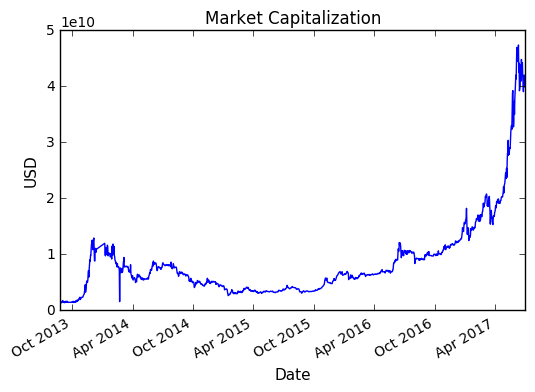

In [17]:
%matplotlib inline
df['Market Cap'].plot()
plt.ylabel('USD', fontsize=11)
plt.xlabel('Date', fontsize=11)
plt.title("Market Capitalization" , fontsize= 12)


##### For dates between 28th November and 11th November

In [18]:
df1 = df[(df.index > '2016-11-10') & (df.index <= '2016-11-28')]


##### For dates between 29th October 2016 to 15th September 2016

In [19]:
df2 = df[(df.index > '2016-09-15') & (df.index <= '2016-10-29')]


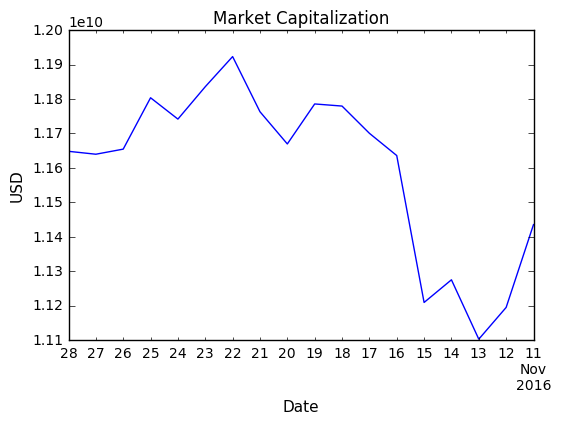

In [20]:
%matplotlib inline
df1['Market Cap'].plot()
plt.ylabel('USD', fontsize=11)
plt.xlabel('Date', fontsize=11)
plt.title("Market Capitalization" , fontsize= 12)

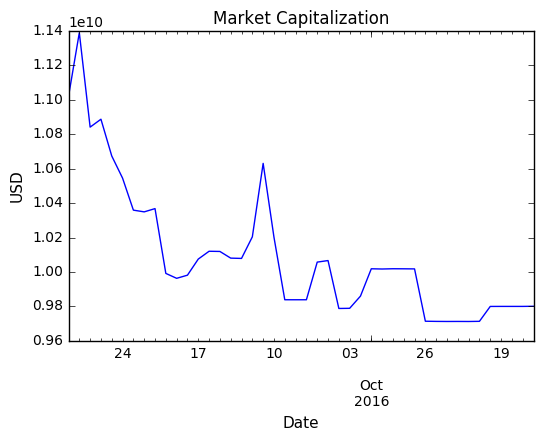

In [21]:
%matplotlib inline
df2['Market Cap'].plot()
plt.ylabel('USD', fontsize=11)
plt.xlabel('Date', fontsize=11)
plt.title("Market Capitalization" , fontsize= 12)

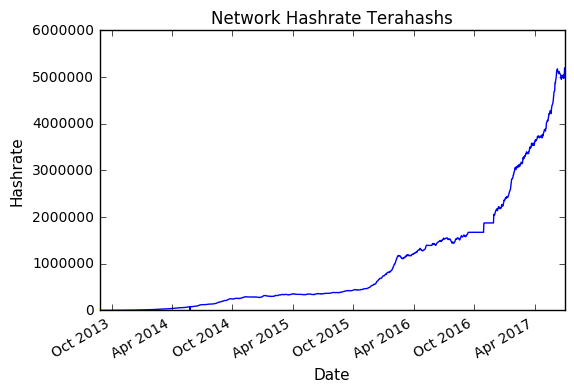

In [22]:
df['Network Hashrate Terahashs'].plot()
plt.ylabel('Hashrate', fontsize=11)
plt.xlabel('Date', fontsize=11)
plt.title("Network Hashrate Terahashs" , fontsize= 12)


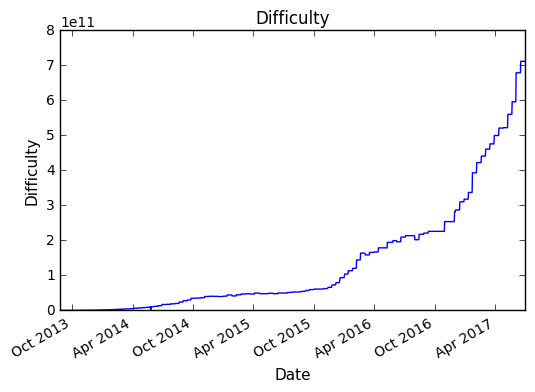

In [23]:
df['Difficulty'].plot()
plt.ylabel('Difficulty', fontsize=11)
plt.xlabel('Date', fontsize=11)
plt.title("Difficulty" , fontsize= 12)


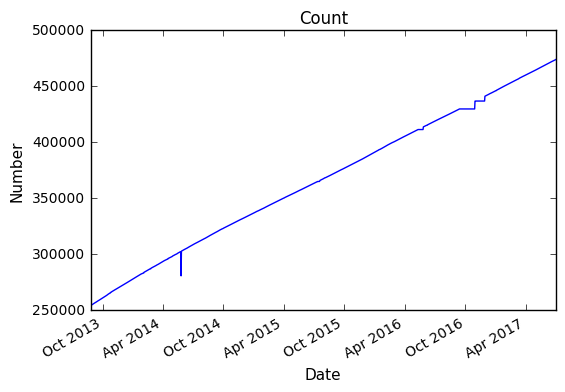

In [24]:
df['Count'].plot()
plt.ylabel('Number', fontsize=11)
plt.xlabel('Date', fontsize=11)
plt.title("Count" , fontsize= 12)


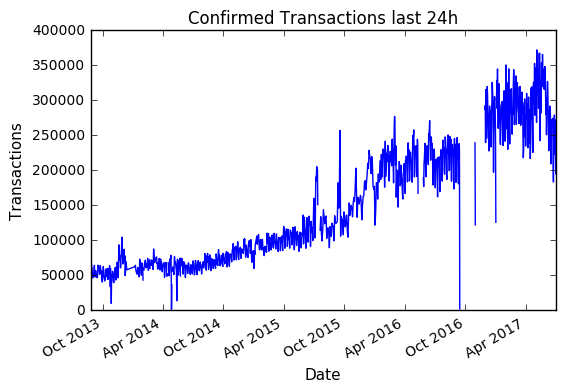

In [25]:
df['Transactions last 24h'].plot()
plt.ylabel('Transactions', fontsize=11)
plt.xlabel('Date', fontsize=11)
plt.title("Confirmed Transactions last 24h" , fontsize= 12)


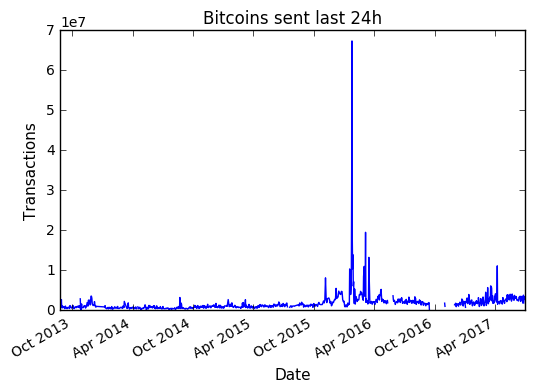

In [26]:
df['Bitcoins sent last 24h'].plot()
plt.ylabel('Transactions', fontsize=11)
plt.xlabel('Date', fontsize=11)
plt.title("Bitcoins sent last 24h" , fontsize= 12)


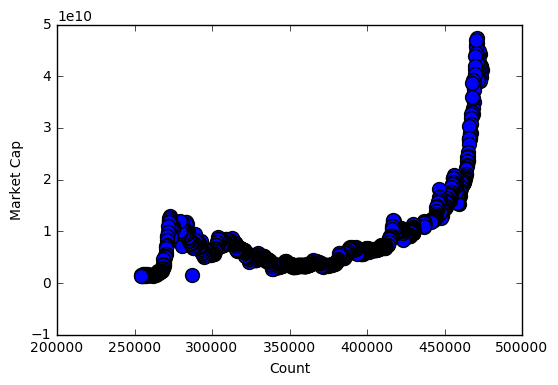

In [27]:
df.plot(kind= "scatter", y = "Market Cap", x = "Count", s = 100)

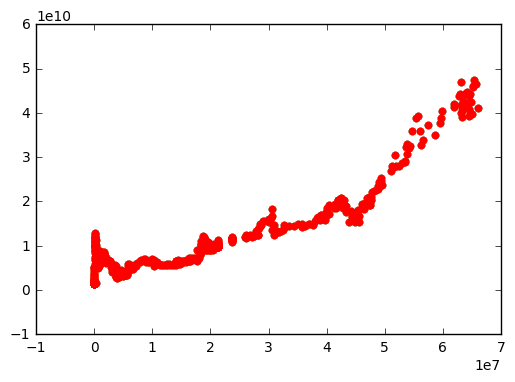

In [28]:
import matplotlib.cm as cm

x = np.arange(10)
ys = [i+x+(i*x)**2 for i in range(10)]

colors = cm.rainbow(np.linspace(0, 1, len(ys)))
for y, c in zip(ys, colors):
    plt.scatter(df["Network Hashrate PetaFLOPS"], df["Market Cap"], color=c)

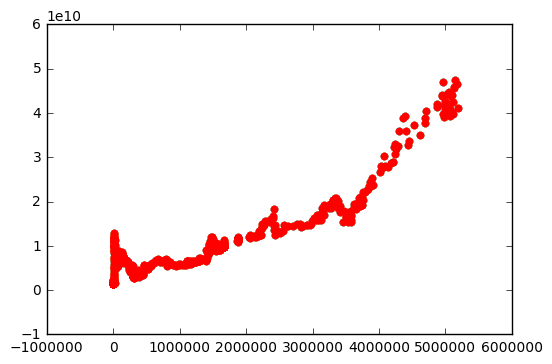

In [29]:
import matplotlib.cm as cm

x = np.arange(10)
ys = [i+x+(i*x)**2 for i in range(10)]

colors = cm.rainbow(np.linspace(0, 1, len(ys)))
for y, c in zip(ys, colors):
    plt.scatter(df["Network Hashrate Terahashs"], df["Market Cap"], color=c)

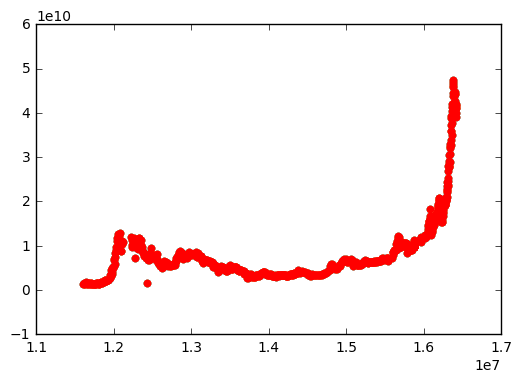

In [30]:
import matplotlib.cm as cm

x = np.arange(10)
ys = [i+x+(i*x)**2 for i in range(10)]

colors = cm.rainbow(np.linspace(0, 1, len(ys)))
for y, c in zip(ys, colors):
    plt.scatter(df["Total BTC"], df["Market Cap"], color=c)

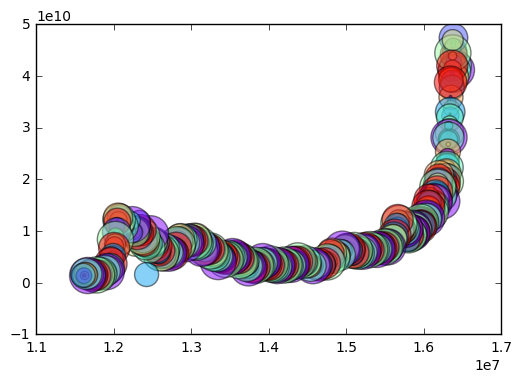

In [31]:
#x = np.arange(10)
#ys = [i+x+(i*x)**2 for i in range(10)]

#colors = cm.rainbow(np.linspace(0, 1, len(ys)))
area = np.pi * (15 * np.random.rand(25))**2  # 0 to 15 point radii

plt.scatter(df["Total BTC"], df["Market Cap"], s=area, c=colors, alpha=0.5)
plt.show()

### Feature Addition

In [32]:
df['Total transactions per day'] = df['Transactions avg. per hour']*24
df['Total Bitcoins sent'] = df['Bitcoins sent avg. per hour']*24
df['Total Blocks'] = df['Blocks avg. per hour']*24

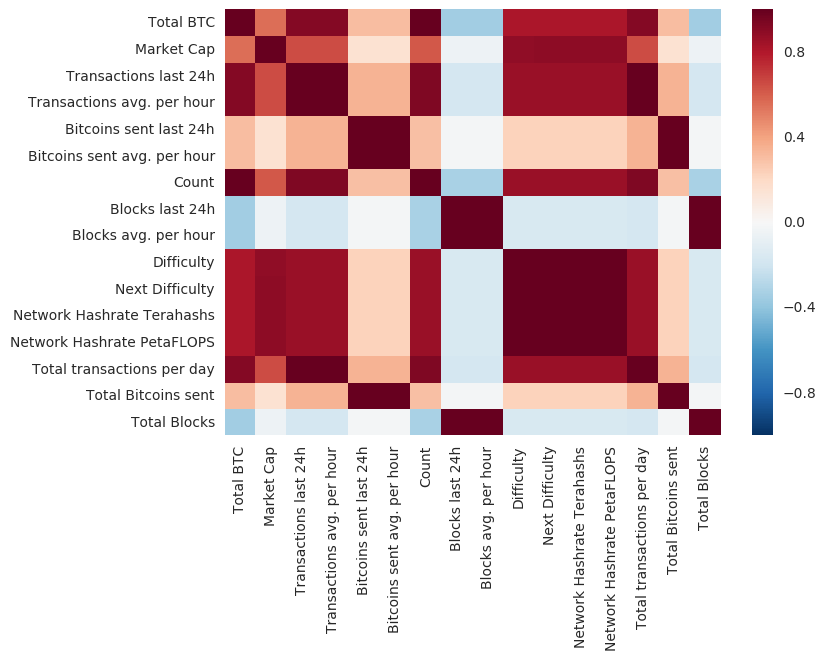

In [33]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
sns.plt.show()

In [34]:
df.columns

Index(['Total BTC', 'Market Cap', 'Transactions last 24h',
       'Transactions avg. per hour', 'Bitcoins sent last 24h',
       'Bitcoins sent avg. per hour', 'Count', 'Blocks last 24h',
       'Blocks avg. per hour', 'Difficulty', 'Next Difficulty',
       'Network Hashrate Terahashs', 'Network Hashrate PetaFLOPS',
       'Total transactions per day', 'Total Bitcoins sent', 'Total Blocks'],
      dtype='object')

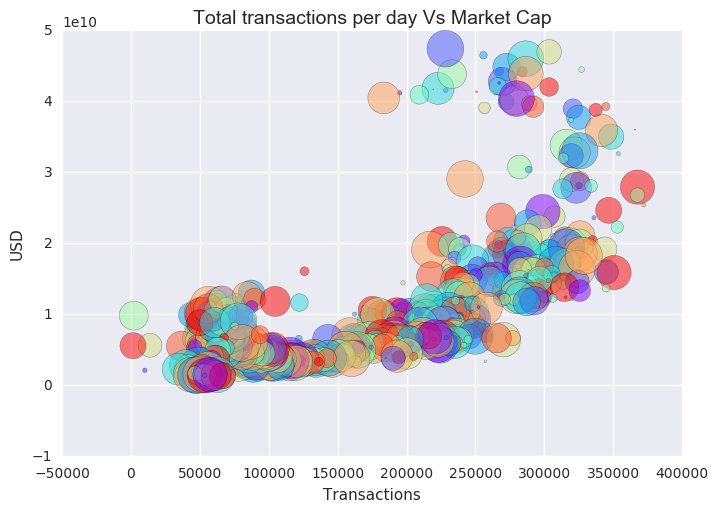

In [35]:
area = np.pi * (15 * np.random.rand(100))**2  # 0 to 15 point radii

plt.scatter(df["Total transactions per day"], df["Market Cap"], s=area, c=colors, alpha=0.5)
plt.ylabel('USD', fontsize=11)
plt.xlabel('Transactions', fontsize=11)
plt.title("Total transactions per day Vs Market Cap" , fontsize= 14)

###### Market cap would give a clear idea about how Bitcoin is doing on transactions each day. I could have gone with Total BTC as well but Market Cap happens to be a better target label in general for any given firm.

After an analysis we see that 'Total BTC', 'Transactions last 24h',
       'Transactions avg. per hour', 'Count', 'Difficulty', 'Next Difficulty',
       'Network Hashrate Terahashs', 'Network Hashrate PetaFLOPS',
       'Total transactions per day' have an effect on 'Market Cap'.
       
We will keep these columns for our model.


    


In [36]:
df = df[['Total BTC', 'Transactions last 24h', 'Transactions avg. per hour', 'Count', 'Difficulty', 'Next Difficulty', 'Network Hashrate Terahashs', 'Network Hashrate PetaFLOPS', 'Total transactions per day','Market Cap']]

In [37]:
df.head()

,Total BTC,Transactions last 24h,Transactions avg. per hour,Count,Difficulty,Next Difficulty,Network Hashrate Terahashs,Network Hashrate PetaFLOPS,Total transactions per day,Market Cap
Date,,,,,,,,,,
2017-07-01,16424225.0,194995.0,8124.79,473937.0,7.086595e+11,7.256475e+11,5194386.85,65968713.02,194994.96,4.116292e+10
2017-06-30,16421875.0,228400.0,9516.67,473749.0,7.116972e+11,7.064707e+11,5057114.58,64225355.14,228400.08,4.153053e+10
2017-06-29,16419750.0,272217.0,11342.38,473579.0,7.116972e+11,6.942885e+11,4969910.51,63117863.49,272217.12,3.988799e+10
2017-06-28,16417888.0,222778.0,9282.42,473430.0,7.116972e+11,6.950965e+11,4975694.57,63191321.09,222778.08,4.179814e+10
2017-06-27,16416400.0,279018.0,11625.75,473311.0,7.116972e+11,7.050714e+11,5047097.46,64098137.76,279018.00,4.202615e+10


We fill any missing or NaN(Not a number) value with -99999 since with ML algorithms, it would then be treated as an outlier value and would just be rejected. 

In [38]:
df.fillna(-9999, inplace = True)

This is where we specify what we want to forecast out. In some cases, you might want to forecast just one particular data point. In this case, I presume that I intend to forecast 1% of my entire data set. The Bitcoin’s data set contains 1231 data points which can be checked just by print(LEN(DF()) ). So this line basically puts a cap on the number of data points I want to predict. 1% of 1231 implies that I would be predicting stock values for about 12–13 dates from today. You can vary the % as well and predict say 10% of the data or 25 or 50%. That affects the accuracy of your built classifier as well. We’ll see that later on.

##### Sort the dataset in reverse order

In [39]:
test = df.sort_index(ascending= True)

In [40]:
test.tail()

,Total BTC,Transactions last 24h,Transactions avg. per hour,Count,Difficulty,Next Difficulty,Network Hashrate Terahashs,Network Hashrate PetaFLOPS,Total transactions per day,Market Cap
Date,,,,,,,,,,
2017-06-27,16416400.0,279018.0,11625.75,473311.0,7.116972e+11,7.050714e+11,5047097.46,64098137.76,279018.00,4.202615e+10
2017-06-28,16417888.0,222778.0,9282.42,473430.0,7.116972e+11,6.950965e+11,4975694.57,63191321.09,222778.08,4.179814e+10
2017-06-29,16419750.0,272217.0,11342.38,473579.0,7.116972e+11,6.942885e+11,4969910.51,63117863.49,272217.12,3.988799e+10
2017-06-30,16421875.0,228400.0,9516.67,473749.0,7.116972e+11,7.064707e+11,5057114.58,64225355.14,228400.08,4.153053e+10
2017-07-01,16424225.0,194995.0,8124.79,473937.0,7.086595e+11,7.256475e+11,5194386.85,65968713.02,194994.96,4.116292e+10


In [41]:
market_cap_pred = int(math.ceil(0.10*len(test)))

Now, we have the different columns and we have defined the forecast_out column as Market Cap which we would be predicting. Using a simple pandas operation, we can now add a new column which would store all the predicted values.

In [42]:
forecast_out = 'Market Cap'
test['label'] = test[forecast_out].shift( - market_cap_pred)

The shift operation basically shifts your forecast_out column(Market Cap); market_cap_pred days into the future. The value of market_cap_pred in our case is between 12–13 days since we are considering 1% of the entire length of the data-frame.
Thus, now we have the label column which would be having the values that our forecast algorithm would be predicting.

In [43]:
test['label']

Date
2013-08-26    9.171864e+09
2013-08-27    1.146374e+10
2013-08-28    9.827548e+09
2013-08-29    9.908834e+09
2013-08-30    1.184014e+10
2013-08-31    1.169228e+10
2013-09-01    1.013888e+10
2013-09-02    1.139465e+10
2013-09-03    9.808052e+09
2013-09-04    9.604077e+09
2013-09-05    8.940672e+09
2013-09-06    8.834799e+09
2013-09-07    8.601213e+09
2013-09-08    8.331834e+09
2013-09-09    8.566196e+09
2013-09-10    8.063567e+09
2013-09-11    7.755652e+09
2013-09-12    8.325982e+09
2013-09-13    7.899083e+09
2013-09-14    7.753188e+09
2013-09-15    7.780472e+09
2013-09-16    7.568391e+09
2013-09-17    7.143396e+09
2013-09-18    1.563747e+09
2013-09-19    7.256828e+09
2013-09-20    7.579906e+09
2013-09-21    7.212119e+09
2013-09-22    6.719450e+09
2013-09-23    7.220663e+09
2013-09-24    6.973918e+09
                  ...     
2017-06-02             NaN
2017-06-03             NaN
2017-06-04             NaN
2017-06-05             NaN
2017-06-06             NaN
2017-06-07             

This is a crucial stage. This is where we make the early inroads towards setting up our inputs. The most basic part of setting up a model is identifying its inputs and the outputs — or the predictors and the targets — or the features and the label. Call it whatever you want.
We store all the variables except the freshly created label variables(which is our target) and store them in a numpy array. Thus, X now represents the set of inputs for us.

In [44]:
X = np.array(test.drop(['label'], 1))

The pre-processing module is an integrated feature within the scikit learn library and if you check out the initial imports, you’ll see that we have imported it.
Line 1: It’s a good idea to scale your set of input variables X in order to standardize your data along any given axis.
preprocessing.scale(X, axis = 0, with_mean = True, with_std = True) are the parameters taken in by the scale command with default values.

In [45]:
X = preprocessing.scale(X)
X_lately = X[-market_cap_pred:] 
X = X[:-market_cap_pred]

C:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:160: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Now there’s an important notion to understand here. I might have defined the set of inputs under X but those values already have the corresponding set of Y values for them since they are a part of historical data. We need to define the set of future X values corresponding to which we would be making predictions. The value X_lately implies the set of input values beginning from the very end(market_cap_pred) or say starting today and going up to the specified period. (: )
Line 3: On the other hand, the set of historical values beginning from the start date/time till the current date/time is represented by this line as is evident from the code.

Source:
    https://medium.com/towards-data-science/predicting-bitcoins-market-cap-early-ml-inroads-to-pre-processing-part-1-5a85aefd4c7d

To begin with, as a precautionary measure we drop records with missing data, if any, from our data frame. In the second line, we define our label. We append a separate column labeled ‘label’ to our data frame and this is the column where the market cap data points(Y values) would be stored corresponding to their X-values(denoted by X). Later on, we would be appending a new column for storing the predicted data points once we reach there.

In [46]:
test.dropna(inplace = True) 
y = np.array(test['label']) 

At this point, it’s a safe measure to check the length of the feature set(X) and label set(y) just to ensure that your preliminary model is stable and there’s for every value of X, there’s a value of y.

In [47]:
len(X)

1136

In [48]:
len(y)

1136

(Crucial) — This is where we segregate our data into training and testing for both X and Y sets. For this, we would be using a simple cross validation technique. Cross validation is a widely used technique especially with its k-fold variations since it shuffles your data randomly. It’s nothing too complex. As is evident from the image below, for a k value of 4, 4 iterations are run across your data set with different test and training groups each time. The user has the flexibility to specify the test size each time they are invoking the cross validation module using Sci-kit learn.

To partition the data, this is what we end up with:
I defined 4 separate variables for training and testing for X and y respectively. Invoking sci-kit learn and from sci-kit learn, cross-validation, this is just a one-liner. You can choose the test size as per your interest. For now, I am at 30%.
Having a considerable fraction for testing leads to a better prediction — that’s certainly a myth. In most cases, that might not be true. We’ll experiment that with our classifier later on and base arguments on our own observations.

In [49]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y,test_size= 0.3)

Creating the classifier: Two aspects — FITTING and ACCURACY. These two aspects are crux of a classifier.
Fitting as the name suggest implies how well your data is fitting the classifier. You train data in order to make it fit well. So fitting is always a derivative of training.
Accuracy on the other hand can be approximated by testing your already-built classifier against a totally unknown set of test data. Thus, it is always related to testing. The fragment of code below should be more comprehensible now.
We are using LINEAR REGRESSION here so that’s our classifier to begin with.

In [50]:
clf = LinearRegression(n_jobs=1)
clf.fit(X_train, y_train)
        # fit always related to training
accuracy = clf.score(X_test, y_test)
        # score/accuracy always related to test

###### Making the prediction
Line 1: clf.predict makes the prediction. It’s essentially your regression equation. On L.H.S is your y-label and on R.H.S is X_lately which is the set of all X-values in the future against which you want your predicted data points(market cap values)
Line 2: Creates a new column ‘Forecast market cap’ in the data frame which is initially set to null(nan) and would be holding the predicted y values.

In [51]:
forecast_set = clf.predict(X_lately) # crux of prediction


test['Forecast market cap'] = np.nan # initially empty


In [52]:
########### SERIES OF TESTS AT THIS POINT ################
print(accuracy)


-244132.240106


In [53]:
test.tail() 

,Total BTC,Transactions last 24h,Transactions avg. per hour,Count,Difficulty,Next Difficulty,Network Hashrate Terahashs,Network Hashrate PetaFLOPS,Total transactions per day,Market Cap,label,Forecast market cap
Date,,,,,,,,,,,,
2017-02-19,16172763.0,251721.0,10488.38,453820.0,4.407799e+11,4.387218e+11,3140493.32,39884265.16,251721.12,1.671609e+10,4.202615e+10,NaN
2017-02-20,16174613.0,282728.0,11780.33,453968.0,4.407799e+11,4.437167e+11,3176247.80,40338347.02,282727.92,1.707803e+10,4.179814e+10,NaN
2017-02-21,16176338.0,279090.0,11628.75,454106.0,4.407799e+11,4.413388e+11,3159226.26,40122173.50,279090.00,1.764782e+10,3.988799e+10,NaN
2017-02-22,16178063.0,282194.0,11758.08,454244.0,4.407799e+11,4.393538e+11,3145017.30,39941719.71,282193.92,1.767445e+10,4.153053e+10,NaN
2017-02-23,16179938.0,325913.0,13579.71,454394.0,4.407799e+11,4.397378e+11,3147766.10,39976629.53,325913.04,1.847475e+10,4.116292e+10,NaN


https://medium.com/towards-data-science/predicting-bitcoins-market-cap-deploying-the-classifier-part-2-af5f2f83162c

to be continued

In this fragment, we play around with dates and times. Now, at this point, say we intend to predict data 10% out into the future. We use -10% of the data; the data from 10% back from today to predict it out, right? Thus, what is crucial is the last day/date in the data frame which is present and then we need to go along assigning forecast for a given new day.

In [54]:
last_date = test.iloc[-1].name
last_unix = last_date.timestamp()
next_unix = last_unix + 86400

Line 1: last_date = df.iloc[-1].name — The df.iloc works on positions in the index and it takes only integers. loc and iloc are two widely used functions. [-1] implies the current date thus df.iloc[-1] would return 1 record which would be for the present date. This is what you get when you run it.

In [55]:
test.iloc[-1]

Total BTC                     1.617994e+07
Transactions last 24h         3.259130e+05
Transactions avg. per hour    1.357971e+04
Count                         4.543940e+05
Difficulty                    4.407799e+11
Next Difficulty               4.397378e+11
Network Hashrate Terahashs    3.147766e+06
Network Hashrate PetaFLOPS    3.997663e+07
Total transactions per day    3.259130e+05
Market Cap                    1.847475e+10
label                         4.116292e+10
Forecast market cap                    NaN
Name: 2017-02-23 00:00:00, dtype: float64

Using .name, we extract the name from the results. As you can see, it returns a UNIX-based time stamp.

In [56]:
test.iloc[-1].name

Timestamp('2017-02-23 00:00:00')

Our job now is to get the time-stamp for present moment. Using .timestamp() gives us that in seconds.

In [57]:
last_date.timestamp()

1487808000.0

Once we have this, we set the value of next_unix to last_unix which you would want to read as today’s timestamp plus 86400(number of seconds in a day) — and now you have yourselves the value of time stamp for tomorrow. Using this pair-wise approach, we use the historical data to make prediction for tomorrow. Using tomorrow’s, we do the same for the day after that. Then using day after that, we do it for the day after that. 0

Here, we use the forecast_set that we created early on that houses the predictions made on X_lately.

Just take a halt and see what your forecast_set looks like: You can see it is an array containing the predicted values. It has exactly 13 values. Can you figure out why? Because you might remember that somewhere early on in the code, we decided to make predictions for 1% of the length of entire data frame.

In [58]:
forecast_set

array([  4.00052196e+10,   4.15568594e+10,   4.10614605e+10,
         4.09463468e+10,   4.22211787e+10,   4.17692808e+10,
         4.23104643e+10,   4.19045822e+10,   4.11593413e+10,
         4.17500787e+10,   4.18873093e+10,   4.30815115e+10,
         4.30309218e+10,   4.34962983e+10,   4.30738550e+10,
         4.25359068e+10,   4.25260306e+10,   4.32959347e+10,
         4.31464779e+10,   4.35882806e+10,   4.32291177e+10,
         4.37287150e+10,   4.45874855e+10,   4.43124780e+10,
         4.46269312e+10,   4.48066087e+10,   4.66002486e+10,
         4.53982096e+10,   4.59674640e+10,   4.54663435e+10,
         4.63978780e+10,   4.64681275e+10,   4.55617736e+10,
         4.43190403e+10,   4.47008986e+10,   4.48870539e+10,
         4.63624051e+10,   4.60795362e+10,   4.71393175e+10,
         4.68069594e+10,   4.68580434e+10,   4.65692590e+10,
         4.67932634e+10,   4.77527458e+10,   4.86051763e+10,
         4.78351219e+10,   4.67582608e+10,   4.75887094e+10,
         4.74990475e+10,

1% of len(df) is approx. 12 and using the ceiling function, we get 13 values. Thus, forecasts are being made for 13 days. Hence, the forecast set.
In this chunk of code, we finally add the forecast to the existing dataframe. We iterate through our forecast_set which is printed above; we take into account each forecast and day and set those values in the data frame.
See it this way — The first line:

next_date = datetime.datetime.fromtimestamp(next_unix) takes in next_unix as argument which is basically tomorrow. Starting tomorrow, we make our predictions.
We keep iterating starting tomorrow till the very end(which is basically 13 days from today, right?)

In [65]:
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    test.loc[next_date] = [np.nan for _ in range(len(test.columns)-1)]+[i]

The last line is somewhat complex. Not in understanding but in writing. It basically sets all the columns except for the last column as NaN. The last column as you can see is +[i] which is basically whatever your prediction would be. Since we won’t be NaNing the last column, we do len(df.columns)-1 and then add a ‘[i]’ which technically is your last column. I hope this clears everything out. You can check it out. This is how your last column would look like.

In [66]:
test.loc[next_date]

Total BTC                              NaN
Transactions last 24h                  NaN
Transactions avg. per hour             NaN
Count                                  NaN
Difficulty                             NaN
Next Difficulty                        NaN
Network Hashrate Terahashs             NaN
Network Hashrate PetaFLOPS             NaN
Total transactions per day             NaN
Market Cap                             NaN
label                                  NaN
Forecast market cap           6.558636e+10
Name: 2018-11-20 00:00:00, dtype: float64

Finally, you invoke all the necessary commands needed to generate the plot. Won’t be sweating on it. Here they are. You can play with them as per your requirements.

In [68]:
test.sort_index(ascending=False)

,Total BTC,Transactions last 24h,Transactions avg. per hour,Count,Difficulty,Next Difficulty,Network Hashrate Terahashs,Network Hashrate PetaFLOPS,Total transactions per day,Market Cap,label,Forecast market cap
Date,,,,,,,,,,,,
2018-11-20 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.558636e+10
2018-11-19 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.296475e+10
2018-11-18 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.195882e+10
2018-11-17 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.168422e+10
2018-11-16 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.336366e+10
2018-11-15 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.202834e+10
2018-11-14 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.189422e+10
2018-11-13 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.162040e+10
2018-11-12 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.192613e+10


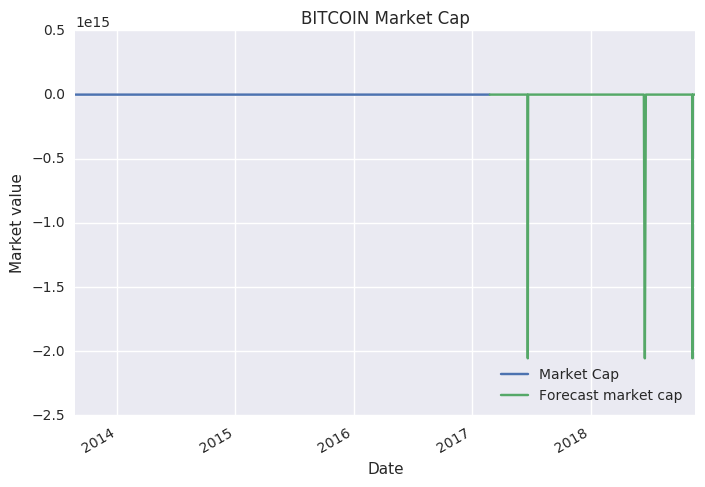

In [69]:
test['Market Cap'].plot()
test['Forecast market cap'].plot()
plt.legend(loc=4)
plt.title('BITCOIN Market Cap')
plt.xlabel('Date')
plt.ylabel('Market value')
plt.show()